# Statistical analysis and prediction of stock market in Russia

## Imports and style

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import date
from finam import Timeframe
from data_preprocessing import Data

In [107]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2}'.format
pd.options.display.precision = 2
pd.options.plotting.backend = 'plotly'
picts_loc = '/mnt/c/Users/Kostya/Pictures/Screenshots/'
data_loc = '/mnt/c/Users/Kostya/data/'

## Descriptive stastistics

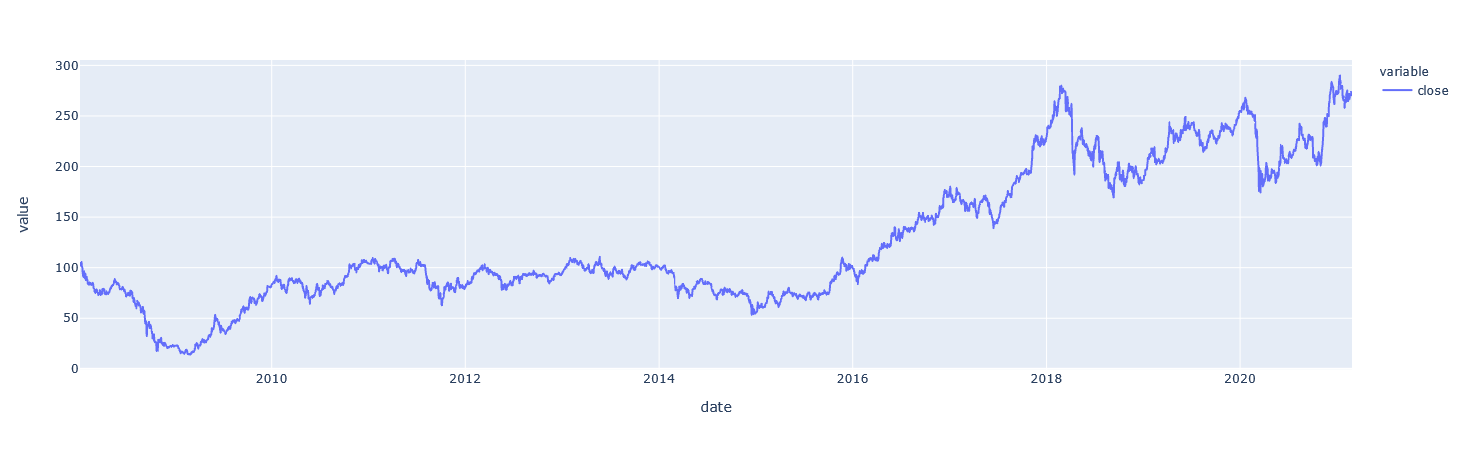

In [108]:
sber_daily = Data('SBER', timeframe=Timeframe.DAILY,
                  start_date=date(2008, 1, 1)
                  ).download()
sber_daily['close'].plot()

In [4]:
sber_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
open,"3,296.000000",125.966726,66.580393,13.800000,78.897500,98.205000,186.750000,291.010000
high,"3,296.000000",127.561396,67.160233,14.490000,80.215000,99.420000,189.492500,296.070000
low,"3,296.000000",124.281839,66.004383,13.500000,77.490000,97.310000,183.800000,286.700000
close,"3,296.000000",125.966745,66.619994,14.160000,78.815000,98.305000,187.042500,289.990000
volume,"3,296.000000","137,008,089.099211","142,135,616.302086","576,700.000000","55,944,445.000000","91,194,715.000000","158,413,105.000000","1,642,064,142.000000"


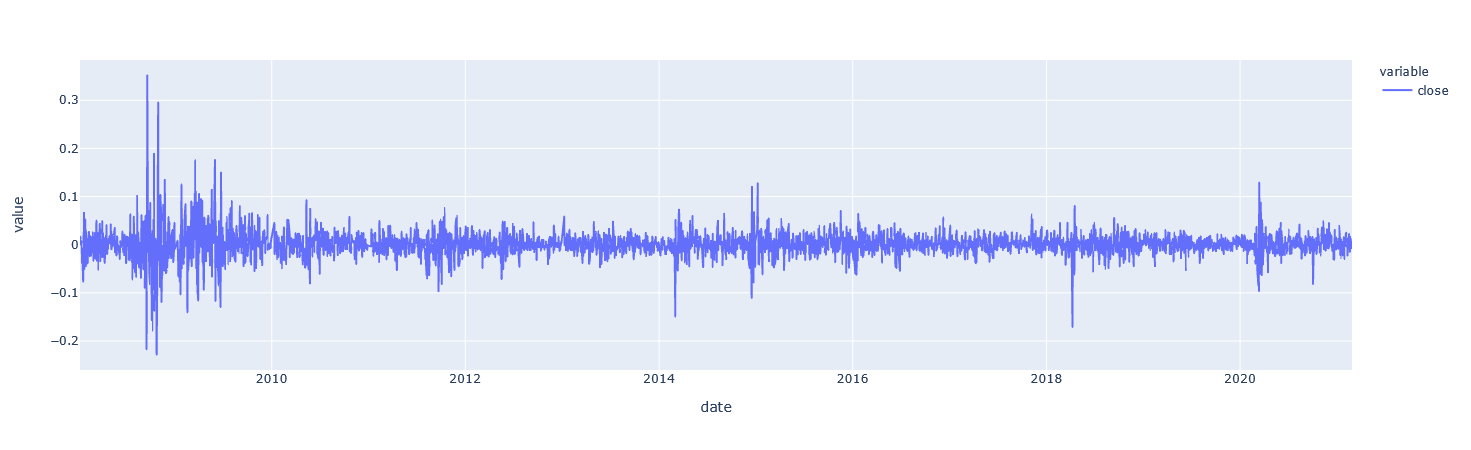

In [5]:
sber_daily['close'].pct_change().fillna(0).plot()

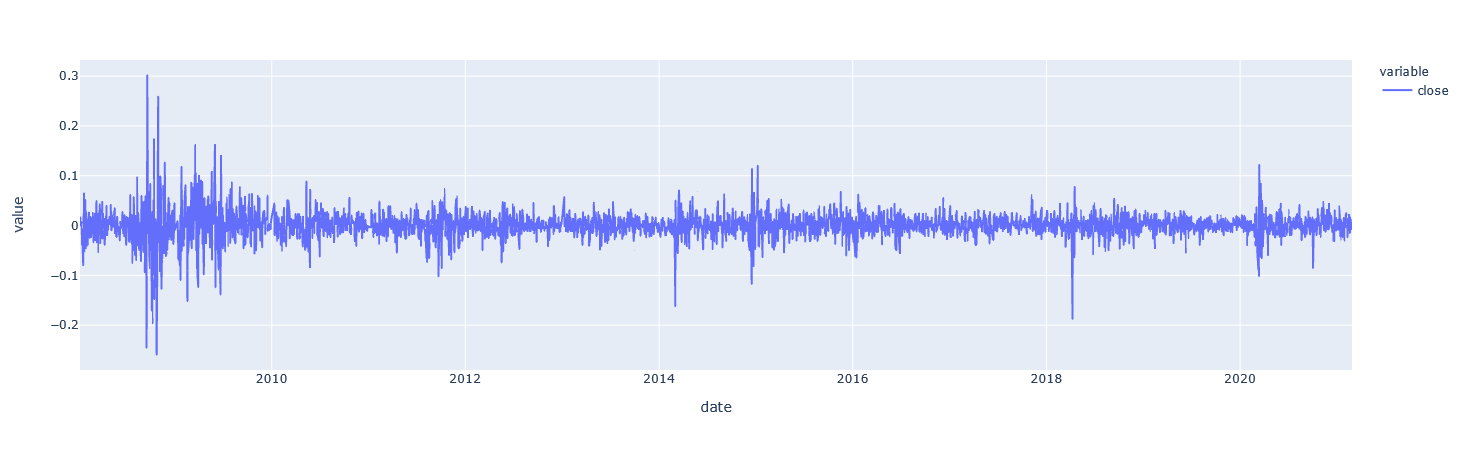

In [6]:
px.line(np.log(sber_daily['close'].pct_change().fillna(0)+1))

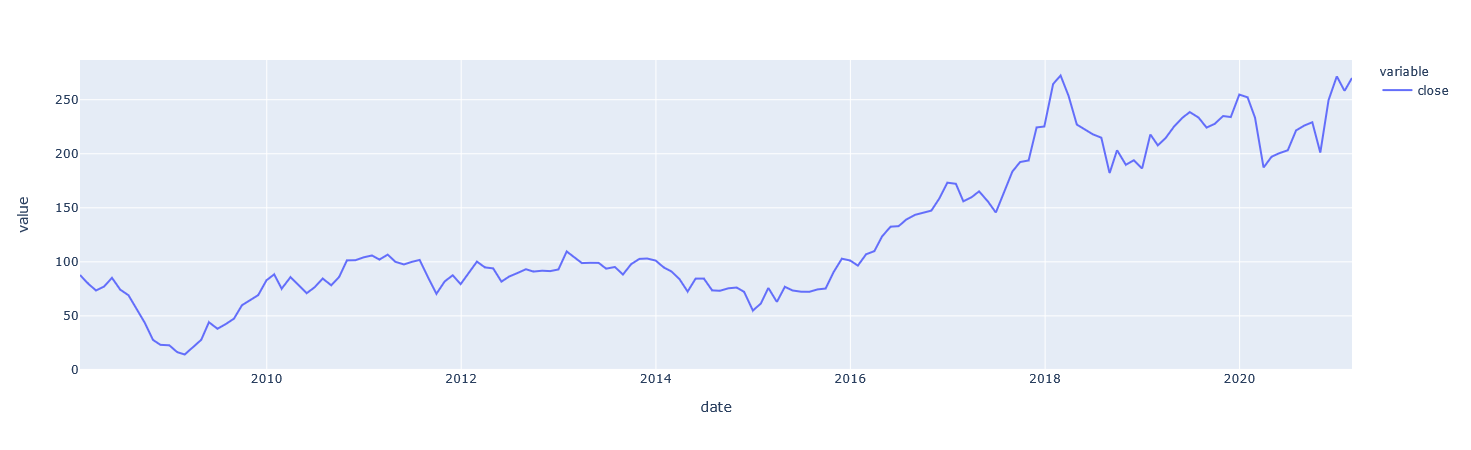

In [7]:
sber_daily['close'].resample('BM').apply(lambda x: x[-1]).plot()

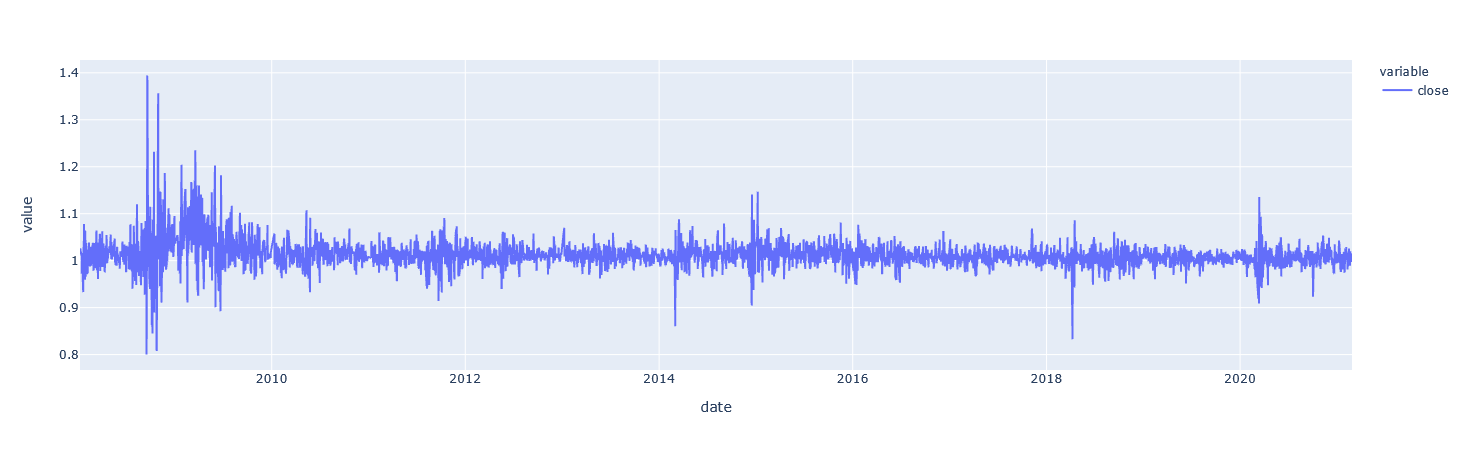

In [8]:
px.line(sber_daily['close'] / (sber_daily['close'].shift(1) - 1))

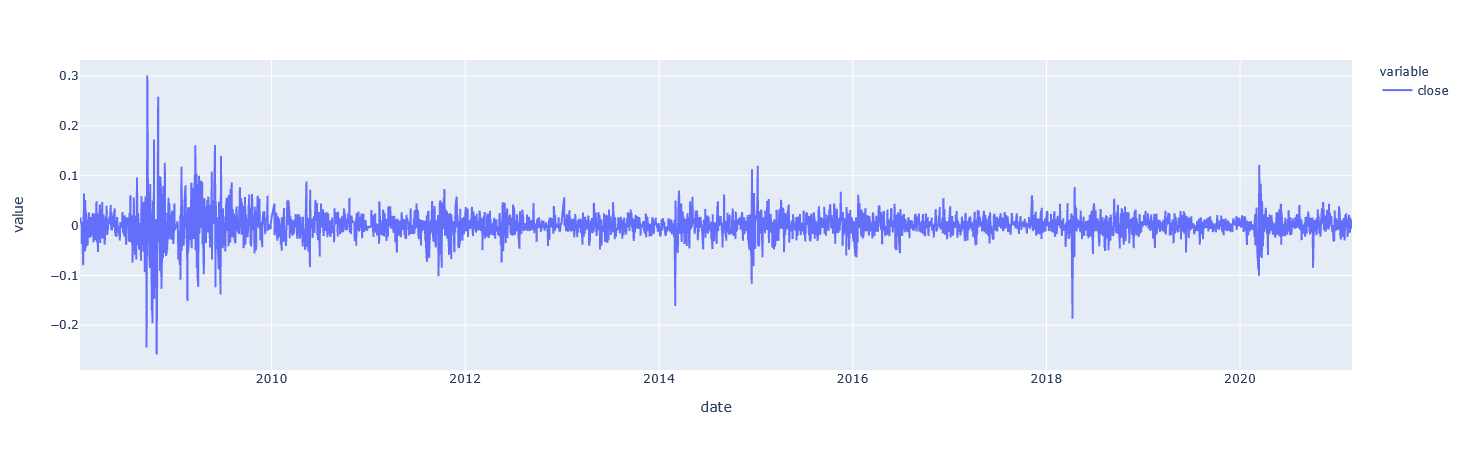

In [9]:
px.line(np.log(sber_daily['close'] / sber_daily['close'].shift(1)))

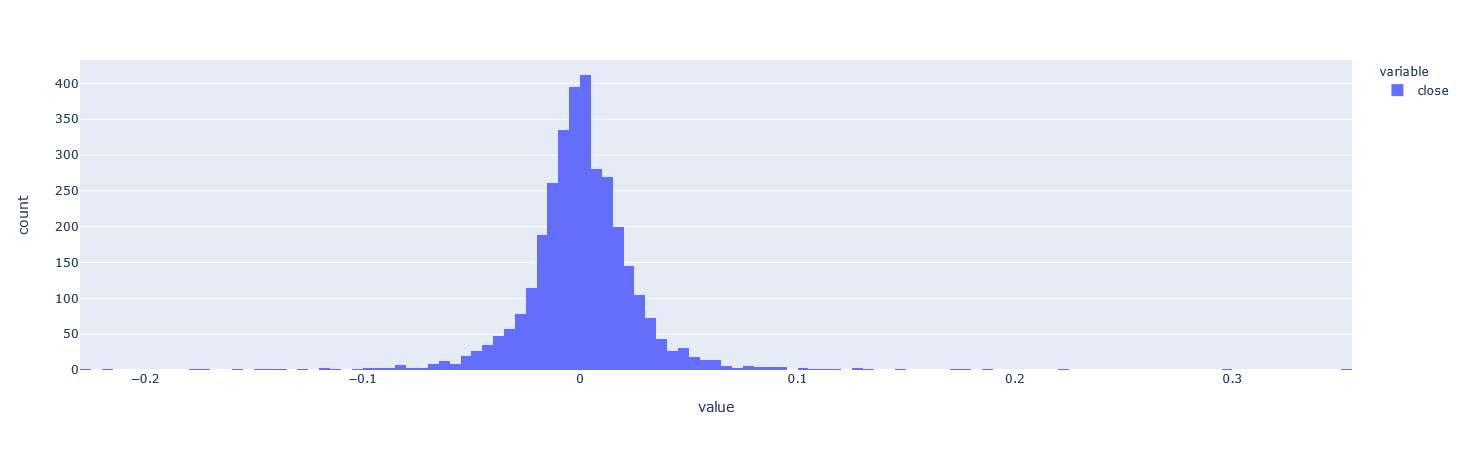

In [10]:
px.histogram(sber_daily['close'].pct_change().fillna(0))

In [11]:
sber_daily.pct_change().fillna(0).describe().T

,count,mean,std,min,25%,50%,75%,max
open,"3,296.000000",0.000714,0.029062,-0.234550,-0.011075,0.000239,0.013092,0.295556
high,"3,296.000000",0.000569,0.023578,-0.150437,-0.009398,0.000281,0.010516,0.281948
low,"3,296.000000",0.000727,0.029372,-0.265985,-0.009592,0.001347,0.011508,0.368301
close,"3,296.000000",0.000674,0.027616,-0.228055,-0.011000,0.000129,0.012831,0.351459
volume,"3,296.000000",0.105417,1.521446,-0.990257,-0.198835,-0.014118,0.234055,82.398491


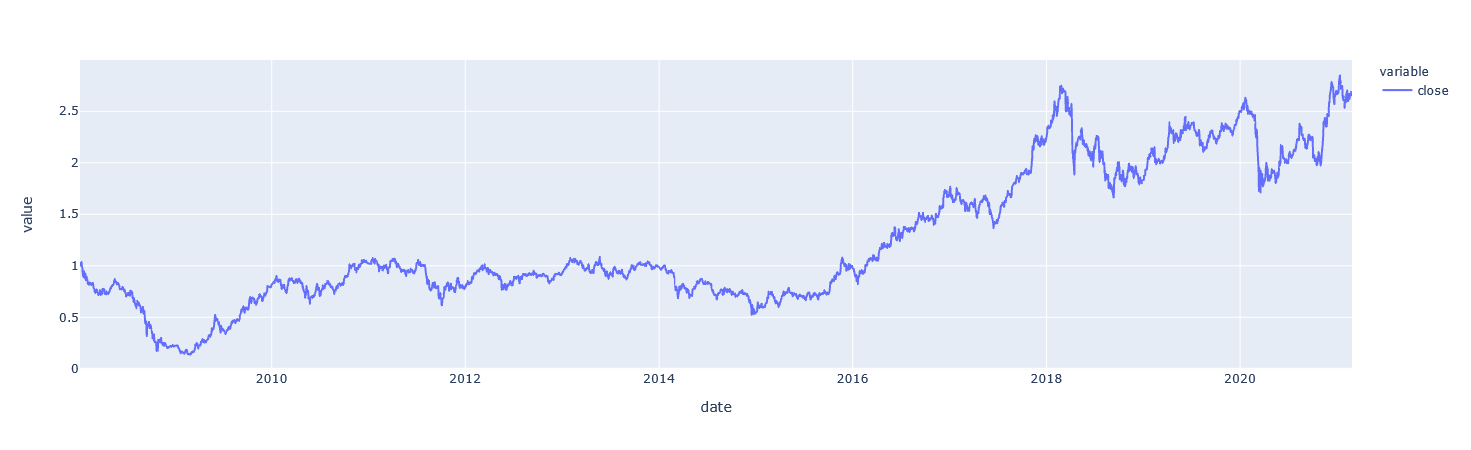

In [12]:
(1 + sber_daily['close'].pct_change().fillna(0)).cumprod().plot()

In [89]:
def get(tickers, start_date, end_date, timeframe=Timeframe.DAILY):
    datas = (Data(ticker, start_date, end_date, timeframe).download()
             for ticker in tickers)
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [91]:
tickers = ['SBER', 'GAZP', 'LKOH', 'GMKN', 'YNDX']
#all_data = get(tickers, start_date=date(2015, 1, 1), end_date=date(2020, 12, 31))

In [94]:
datas = (Data(ticker, start_date=date(2015, 1, 1), end_date=date(2020, 1, 1), timeframe=Timeframe.DAILY).download()
             for ticker in tickers)

In [97]:
df = (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [106]:
df.loc['SBER']

,open,high,low,close,volume
Date,,,,,
2015-01-05,"2,201.0","2,317.0","2,200.9","2,295.0",567607
2015-01-06,"2,289.9","2,376.0","2,281.5","2,345.0",811041
2015-01-08,"2,371.1","2,595.1","2,361.0","2,572.0",1099715
2015-01-09,"2,565.0","2,579.0","2,452.5","2,461.0",1203809
2015-01-12,"2,460.0","2,519.0","2,441.4","2,477.0",909067
...,...,...,...,...,...
2019-12-24,"6,082.0","6,084.5","6,050.0","6,080.5",375655
2019-12-25,"6,083.5","6,089.5","6,073.0","6,081.0",235338
2019-12-26,"6,081.5","6,090.0","6,076.0","6,085.0",252198
